In [1]:
from owid.catalog import Dataset
from etl.paths import DATA_DIR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ds = Dataset(
    DATA_DIR
    / "garden"
    / "tourism"
    / "2023-05-10"
    / "unwto_gdp"
)

df = pd.DataFrame(ds["unwto_gdp"])

df.head()

ds_env = Dataset(
    DATA_DIR
    / "garden"
    / "tourism"
    / "2023-05-10"
    / "unwto_environment"
)

ds_co2 = Dataset(
    DATA_DIR
    / "garden"
    / "tourism"
    / "2023-05-10"
    / "icct_co2"
)

df_gdp = pd.DataFrame(ds["unwto_gdp"])
df_env = pd.DataFrame(ds_env["unwto_environment"])
df_co2 = pd.DataFrame(ds_co2["icct_co2"])

df.head()

countries = ["World",
  "Australia and New Zealand",
  "Central Asia and Southern Asia",
  "Eastern Asia and South-eastern Asia",
  "Europe",
  "Latin America and the Caribbean",
  "Northern America",
  "Northern America and Europe",
  "Oceania excluding Australia and New Zealand",
  "Sub-Saharan Africa",
  "Western Asia and Northern Africa"]

# replace '<NA>' with np.nan
df_env = df_env.replace('<NA>', np.nan)

# drop rows with np.nan values
df_env = df_env.dropna()

In [2]:
df_co2.set_index(['country', 'year'], inplace = True)
assert len(df_co2.index.levels) == 2 and df_co2.index.is_unique, "Index is not well constructed"
df_gdp.set_index(['country', 'year'], inplace = True)
assert len(df_gdp.index.levels) == 2 and df.index.is_unique, "Index is not well constructed"
df_env.set_index(['country', 'year'], inplace = True)
assert len(df_env.index.levels) == 2 and df_env.index.is_unique, "Index is not well constructed"

In [8]:
df_env.reset_index(inplace= True)
df_env = df_env.dropna(inplace=False)


In [12]:
df_co2.reset_index(inplace = True)

In [15]:
df_co2['year'].unique()

array([2013, 2018, 2019], dtype=uint64)

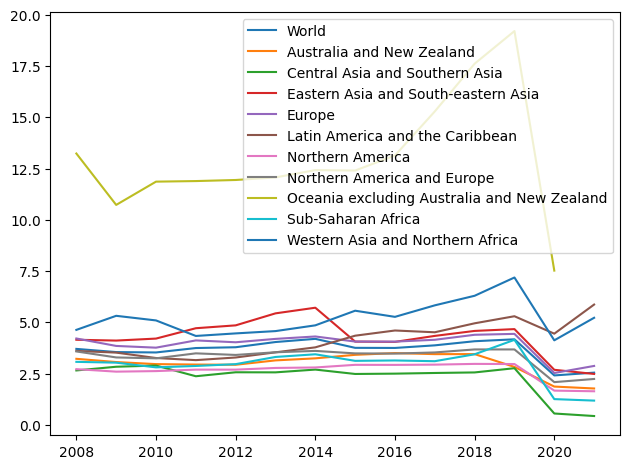

In [8]:
df_filtered = df[df.index.get_level_values('country').isin(countries)]
df_env_filt = df_env[df_env.index.get_level_values('country').isin(countries)]

# assuming your DataFrame has a MultiIndex with level 0 as country and level 1 as year

for i, country in enumerate(countries):
    df_country = df_filtered.loc[country]
    plt.plot(df_country.index.get_level_values('year'), df_country['gdp'], label = country)

plt.tight_layout()
plt.legend()
plt.show()

